In [1]:
from ensembles import RandomForestMSE, GradientBoostingMSE
import pandas as pd
import numpy as np

# 1) Предобработка данных

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df = df.drop(["id", "zipcode"], axis=1)

In [6]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = np.radians(lon1), np.radians(lat1), np.radians(lon2), np.radians(lat2)
    delta_lon = lon2 - lon1
    delta_lat = lat2 - lat1
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2) ** 2
    return 6357 * 2 * np.arcsin(np.sqrt(a))

In [7]:
df.loc[:, "distance"] =  haversine(df["long"], df["lat"], -122.332, 47.6062)

In [8]:
df = df.drop(["long", "lat"], axis=1)

In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df["yr"] = df["date"].dt.strftime("%y").astype('int')
df["month"] = df["date"].dt.strftime("%m").astype('int')
df["day"] = df["date"].dt.strftime("%d").astype('int')

In [11]:
df["time_after_renovation"] = df["yr"] - df[["yr_built", "yr_renovated"]].max(axis=1)

In [12]:
df.isna().any()

date                     False
price                    False
bedrooms                 False
bathrooms                False
sqft_living              False
sqft_lot                 False
floors                   False
waterfront               False
view                     False
condition                False
grade                    False
sqft_above               False
sqft_basement            False
yr_built                 False
yr_renovated             False
sqft_living15            False
sqft_lot15               False
distance                 False
yr                       False
month                    False
day                      False
time_after_renovation    False
dtype: bool

In [13]:
y = df["price"]
X = df.drop(["price", "date"], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [17]:
X_train

array([[ 4.000e+00,  2.500e+00,  2.680e+03, ...,  3.000e+00,  2.400e+01,
        -1.984e+03],
       [ 4.000e+00,  1.750e+00,  2.340e+03, ...,  1.000e+01,  1.000e+00,
        -1.910e+03],
       [ 4.000e+00,  2.250e+00,  2.190e+03, ...,  8.000e+00,  1.200e+01,
        -1.964e+03],
       ...,
       [ 3.000e+00,  2.500e+00,  2.120e+03, ...,  9.000e+00,  3.000e+01,
        -1.990e+03],
       [ 1.000e+00,  7.500e-01,  3.800e+02, ...,  6.000e+00,  2.000e+01,
        -1.949e+03],
       [ 4.000e+00,  2.500e+00,  3.130e+03, ...,  3.000e+00,  2.500e+01,
        -1.991e+03]])

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib

In [19]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

In [20]:
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("darkgrid")
font =  {
            'family': 'DejaVu Sans',
            'weight': 'normal',
            'size'  :  14
        }

matplotlib.rc('font', **font)

In [21]:
y_test.mean()

545799.9426280074

# 2) RandomForest

In [22]:
model = RandomForestMSE(1000)

In [23]:
hist = model.fit(X_train, y_train, X_test, y_test)

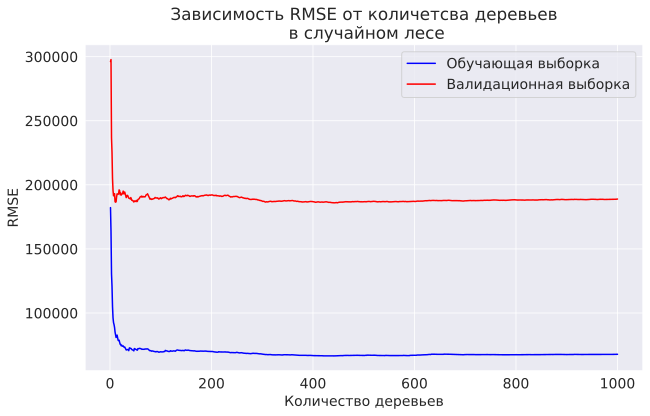

In [24]:
plt.plot(np.arange(len(hist["train-loss"])) + 1, hist["train-loss"], c='b', label='Обучающая выборка')
plt.plot(np.arange(len(hist["train-loss"])) + 1, hist["val-loss"], c='r', label='Валидационная выборка')
plt.title("Зависимость RMSE от количетсва деревьев\n в случайном лесе")
plt.ylabel("RMSE")
plt.xlabel("Количество деревьев")
plt.legend()
plt.savefig("img/rf_estimators_mse.svg")
plt.show()

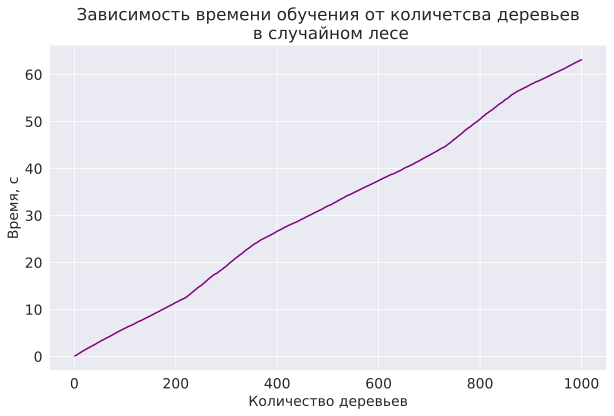

In [25]:
plt.plot(np.arange(len(hist["train-loss"])) + 1, hist["time"], c='purple')
plt.title("Зависимость времени обучения от количетсва деревьев\n в случайном лесе")
plt.ylabel("Время, с")
plt.xlabel("Количество деревьев")
plt.savefig("img/rf_estimators_time.svg")
plt.show()

In [26]:
depth_grid = np.arange(1, 30, dtype=int)
depth_train = []
depth_val = []
depth_time = []
for depth in depth_grid:
    model = RandomForestMSE(1000, max_depth=depth)
    hist = model.fit(X_train, y_train, X_test, y_test)
    depth_train.append(hist['train-loss'][-1])
    depth_val.append(hist['val-loss'][-1])
    depth_time.append(hist['time'][-1])

In [27]:
print(depth_grid)
print(depth_train)
print(depth_val)
print(depth_time)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[286126.8428382918, 248557.55199158008, 216808.73636901914, 198470.11029899906, 186649.47109792443, 176010.7937755137, 167075.83517286665, 157477.1264743327, 145852.44747672186, 136632.38295753032, 127899.48583894018, 119136.86832935763, 111669.56130386729, 102282.32341826388, 97963.17881576858, 91843.87830694478, 85443.59353137828, 81597.40224393028, 77396.8057903732, 76299.599174696, 73138.01870828876, 72513.51766382185, 71935.58166680636, 71919.87411842617, 71996.84778812077, 70829.63488524263, 68779.2094709257, 68315.27786999187, 69438.70227023691]
[303902.4400275939, 265438.9154528892, 237441.42756186696, 220053.20632511497, 211575.02862742508, 204966.72332327993, 201733.4231454741, 198493.70151327216, 194259.5465082535, 193196.9296889461, 193089.8154226078, 192012.80386788113, 192680.5051056005, 189129.98943015534, 192501.43029659972, 192933.95767582208, 189812.4489340903, 190425.5335634265,

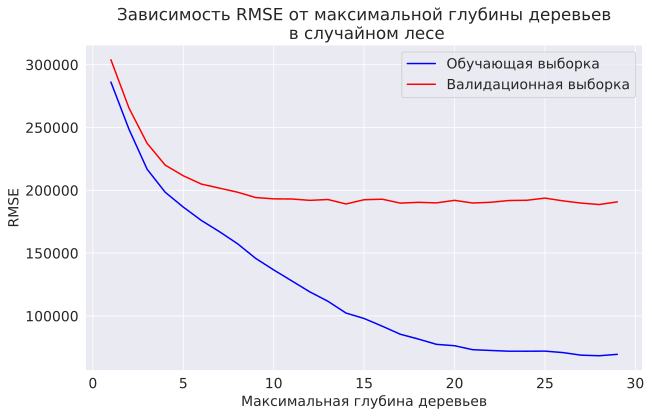

In [28]:
plt.plot(depth_grid, depth_train, c='b', label='Обучающая выборка')
plt.plot(depth_grid, depth_val, c='r', label='Валидационная выборка')
plt.title("Зависимость RMSE от максимальной глубины деревьев\n в случайном лесе")
plt.ylabel("RMSE")
plt.xlabel("Максимальная глубина деревьев")
plt.legend()
plt.savefig("img/rf_depth_mse.svg")
plt.show()

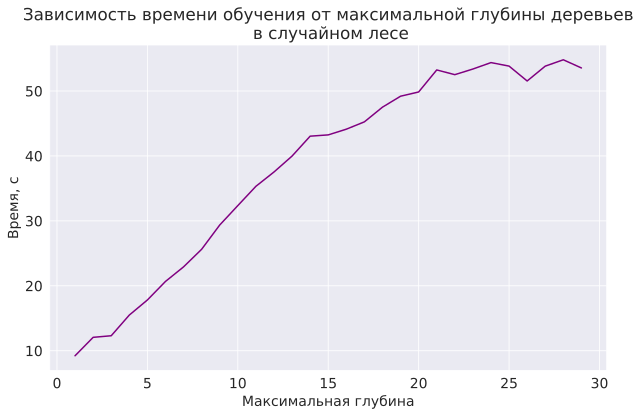

In [29]:
plt.plot(depth_grid, depth_time, c='purple')
plt.title("Зависимость времени обучения от максимальной глубины деревьев\n в случайном лесе")
plt.ylabel("Время, с")
plt.xlabel("Максимальная глубина")
plt.savefig("img/rf_depth_time.svg")
plt.show()

In [30]:
model = RandomForestMSE(1000, max_depth=None)
hist = model.fit(X_train, y_train, X_test, y_test)
print(hist['train-loss'][-1])
print(hist['val-loss'][-1])
print(hist['time'][-1])

69084.58958011317
190805.95822953657
53.77274751663208


In [31]:
features_grid = [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.7, 0.8, 0.9, 1]
features_train = []
features_val = []
features_time = []
for feat in features_grid:
    model = RandomForestMSE(1000, max_depth=11, feature_subsample_size=feat)
    hist = model.fit(X_train, y_train, X_test, y_test)
    features_train.append(hist['train-loss'][-1])
    features_val.append(hist['val-loss'][-1])
    features_time.append(hist['time'][-1])

In [32]:
print(features_grid)
print(features_train)
print(features_val)
print(features_time)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.7, 0.8, 0.9, 1]
[234394.4939667193, 159836.42353825725, 128731.40519512017, 114431.95970245414, 104982.48380911801, 103915.3593834426, 95325.0434372758, 92111.12037249502, 90861.41633682541, 90658.0874494269]
[280757.24375814525, 221739.89084345722, 193832.41997769263, 179511.52672834753, 168061.3484395535, 167245.768216789, 157455.8678930477, 153737.28261502166, 151472.450169833, 151578.73089058272]
[12.306615114212036, 22.477015495300293, 33.13214874267578, 44.76154327392578, 54.75699496269226, 53.853007316589355, 73.98435616493225, 85.01900744438171, 94.9325909614563, 110.56470036506653]


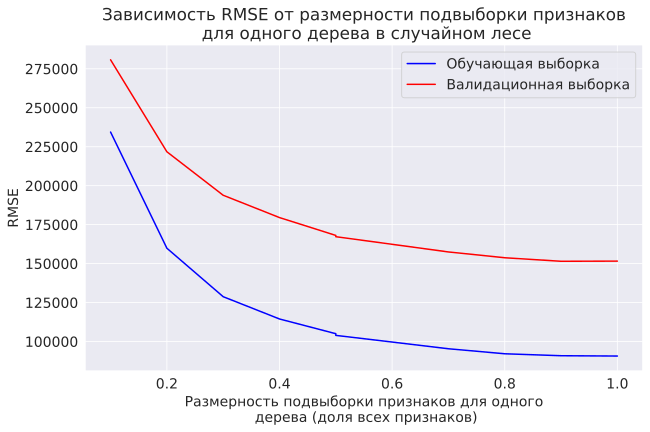

In [33]:
plt.plot(features_grid, features_train, c='b', label='Обучающая выборка')
plt.plot(features_grid, features_val, c='r', label='Валидационная выборка')
plt.title("Зависимость RMSE от размерности подвыборки признаков\n для одного дерева в случайном лесе")
plt.ylabel("RMSE")
plt.xlabel("Размерность подвыборки признаков для одного\n дерева (доля всех признаков)")
plt.legend()
plt.savefig("img/rf_features_mse.svg")
plt.show()

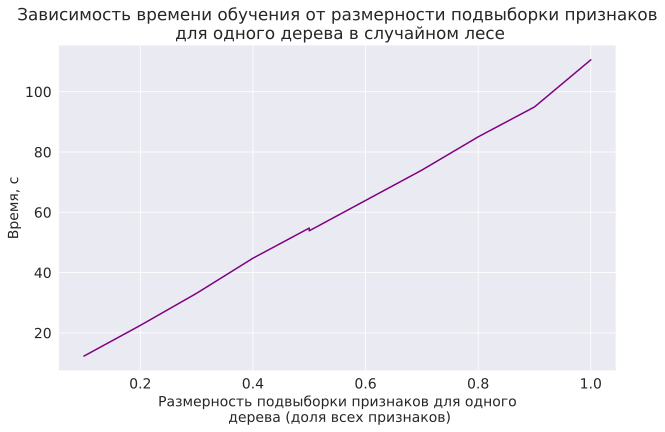

In [34]:
plt.plot(features_grid, features_time, c='purple')
plt.title("Зависимость времени обучения от размерности подвыборки признаков\n для одного дерева в случайном лесе")
plt.ylabel("Время, с")
plt.xlabel("Размерность подвыборки признаков для одного\n дерева (доля всех признаков)")
plt.savefig("img/rf_features_time.svg")
plt.show()